## **The In-Form Eleven** - **_EURO 2024_**

Italy's Most Active Players for Euro 2024

In [90]:
#imports
import pandas as pd
import numpy as np

import bs4
import requests

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from highlight_text import fig_text

from PIL import Image
import urllib

##### **Data Retrieval**

- https://fbref.com/en/comps/Big5/playingtime/players/Big-5-European-Leagues-Stats

In [2]:
pt_big5_players = pd.read_html('https://fbref.com/en/comps/Big5/playingtime/players/Big-5-European-Leagues-Stats', attrs={'id':'stats_playing_time'})[0]
pt_big5_players.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0   
                  Rk             Player             Nation                Pos   
0                  1         Max Aarons            eng ENG                 DF  \
1                  2   Brenden Aaronson             us USA              MF,FW   
2                  3    Paxten Aaronson             us USA                 MF   
3                  4     James Abankwah             ie IRL                 DF   
4                  5  Keyliane Abdallah             fr FRA                 FW   

  Unnamed: 4_level_0  Unnamed: 5_level_0 Unnamed: 6_level_0   
               Squad                Comp                Age   
0        Bournemouth  eng Premier League                 23  \
1       Union Berlin       de Bundesliga                 22   
2     Eint Frankfurt       de Bundesliga                 19   
3            Udinese          it Serie A                 19   
4          Marseille          fr Ligue 1                 17   

  Unnamed: 7_level_0 Playing Time        ... Team Success                
                Born           MP   Min  ...         onGA  +/-   +/-90   
0               2000           20  1237  ...           34  -22   -1.60  \
1               2000           30  1267  ...           23   -6   -0.43   
2               2003            7   101  ...            2    0    0.00   
3               2004            0   NaN  ...          NaN  NaN     NaN   
4               2006            1     4  ...            0   +1  +22.50   

          Team Success (xG)                             Unnamed: 30_level_0  
   On-Off              onxG onxGA  xG+/- xG+/-90 On-Off             Matches  
0   -1.97              14.2  27.1  -12.8   -0.94  -1.37             Matches  
1   +0.53              15.4  21.2   -5.9   -0.42  -0.19             Matches  
2   -0.03               1.1   2.6   -1.5   -1.30  -1.16             Matches  
3     NaN               NaN   NaN    NaN     NaN    NaN             Matches  
4  +22.21               0.2   0.0   +0.2   +4.03  +3.46             Matches  

[5 rows x 31 columns]

In [3]:
pt_big5_players.columns = [' '.join(col).strip() for col in pt_big5_players.columns]

# create a list with new column names
new_columns = []
for col in pt_big5_players.columns:
    if 'level_0' in col:
        new_col = col.split()[-1]  # takes the last name
    else:
        new_col = col
    new_columns.append(new_col)

# rename columns
pt_big5_players.columns = new_columns

pt_big5_players.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,Playing Time MP,Playing Time Min,...,Team Success onGA,Team Success +/-,Team Success +/-90,Team Success On-Off,Team Success (xG) onxG,Team Success (xG) onxGA,Team Success (xG) xG+/-,Team Success (xG) xG+/-90,Team Success (xG) On-Off,Matches
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23,2000,20,1237,...,34,-22,-1.60,-1.97,14.2,27.1,-12.8,-0.94,-1.37,Matches
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22,2000,30,1267,...,23,-6,-0.43,+0.53,15.4,21.2,-5.9,-0.42,-0.19,Matches
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19,2003,7,101,...,2,0,0.00,-0.03,1.1,2.6,-1.5,-1.30,-1.16,Matches
3,4,James Abankwah,ie IRL,DF,Udinese,it Serie A,19,2004,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17,2006,1,4,...,0,+1,+22.50,+22.21,0.2,0.0,+0.2,+4.03,+3.46,Matches


In [4]:
# clean data
pt_big5_players['Age'] = pt_big5_players['Age'].str[:2]
pt_big5_players['Position'] = pt_big5_players['Pos'].str[:2]
pt_big5_players['Nation'] = pt_big5_players['Nation'].str.split(' ').str.get(1)
pt_big5_players = pt_big5_players.drop(columns=['Rk', 'Pos', 'Matches'])

pt_big5_players.head()

,Player,Nation,Squad,Comp,Age,Born,Playing Time MP,Playing Time Min,Playing Time Mn/MP,Playing Time Min%,...,Team Success onGA,Team Success +/-,Team Success +/-90,Team Success On-Off,Team Success (xG) onxG,Team Success (xG) onxGA,Team Success (xG) xG+/-,Team Success (xG) xG+/-90,Team Success (xG) On-Off,Position
0,Max Aarons,ENG,Bournemouth,eng Premier League,23,2000,20,1237,62,36.2,...,34,-22,-1.60,-1.97,14.2,27.1,-12.8,-0.94,-1.37,DF
1,Brenden Aaronson,USA,Union Berlin,de Bundesliga,22,2000,30,1267,42,41.4,...,23,-6,-0.43,+0.53,15.4,21.2,-5.9,-0.42,-0.19,MF
2,Paxten Aaronson,USA,Eint Frankfurt,de Bundesliga,19,2003,7,101,14,3.3,...,2,0,0.00,-0.03,1.1,2.6,-1.5,-1.30,-1.16,MF
3,James Abankwah,IRL,Udinese,it Serie A,19,2004,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DF
4,Keyliane Abdallah,FRA,Marseille,fr Ligue 1,17,2006,1,4,4,0.1,...,0,+1,+22.50,+22.21,0.2,0.0,+0.2,+4.03,+3.46,FW


In [5]:
# save as csv
pt_big5_players.to_csv('../data/big5_23-24_players_pt.csv',index=False)

##### **Data Preparation**

In [2]:
pt_big5_players = pd.read_csv('../data/big5_23-24_players_pt.csv')

In [3]:
print(pt_big5_players.shape)
print('')
print(pt_big5_players.columns)

(3653, 29)

Index(['Player', 'Nation', 'Squad', 'Comp', 'Age', 'Born', 'Playing Time MP',
       'Playing Time Min', 'Playing Time Mn/MP', 'Playing Time Min%',
       'Playing Time 90s', 'Starts Starts', 'Starts Mn/Start', 'Starts Compl',
       'Subs Subs', 'Subs Mn/Sub', 'Subs unSub', 'Team Success PPM',
       'Team Success onG', 'Team Success onGA', 'Team Success +/-',
       'Team Success +/-90', 'Team Success On-Off', 'Team Success (xG) onxG',
       'Team Success (xG) onxGA', 'Team Success (xG) xG+/-',
       'Team Success (xG) xG+/-90', 'Team Success (xG) On-Off', 'Position'],
      dtype='object')


In [4]:
# select only relevant columns
pt_big5_players = pt_big5_players[['Player', 'Nation', 'Squad', 'Comp', 'Age', 'Born', 'Playing Time MP', 'Playing Time Min', 'Starts Starts', 'Subs Subs', 'Subs unSub', 'Position']]

In [5]:
# rename columns
pt_big5_players.rename(columns={'Comp': 'League', 'Playing Time MP': 'MP', 'Playing Time Min': 'Min', 'Starts Starts': 'Starts', 'Subs Subs': 'Subs', 'Subs unSub': 'unSub'}, inplace=True)
print(pt_big5_players.columns)

Index(['Player', 'Nation', 'Squad', 'League', 'Age', 'Born', 'MP', 'Min',
       'Starts', 'Subs', 'unSub', 'Position'],
      dtype='object')


In [6]:
columns_to_convert = ['Age', 'Born', 'MP', 'Min', 'Starts', 'Subs', 'unSub']

# convert columns to numeric
pt_big5_players[columns_to_convert] = pt_big5_players[columns_to_convert].apply(pd.to_numeric, errors='coerce', downcast='integer')

In [7]:
columns_to_int = ['Age', 'Born', 'MP', 'Min', 'Starts', 'Subs', 'unSub']

pt_big5_players[columns_to_int] = pt_big5_players[columns_to_int].fillna(0).astype(int)

In [8]:
pt_big5_players.dtypes

Player      object
Nation      object
Squad       object
League      object
Age          int32
Born         int32
MP           int32
Min          int32
Starts       int32
Subs         int32
unSub        int32
Position    object
dtype: object

##### **Data Modeling**

**EURO 2024** - Italy

In [9]:
convocati_italia = [
    'Gianluigi Donnarumma', 'Alex Meret', 'Guglielmo Vicario',
    'Alessandro Bastoni', 'Raoul Bellanova', 'Alessandro Buongiorno', 'Riccardo Calafiori', 'Andrea Cambiaso',
    'Matteo Darmian', 'Giovanni Di Lorenzo', 'Federico Dimarco', 'Federico Gatti', 'Gianluca Mancini',
    'Nicolò Barella', 'Bryan Cristante', 'Nicolò Fagioli', 'Michael Folorunsho', 'Davide Frattesi', 'Jorginho',
    'Lorenzo Pellegrini', 'Federico Chiesa', 'Stephan El Shaarawy',
    'Giacomo Raspadori', 'Mateo Retegui', 'Gianluca Scamacca', 'Mattia Zaccagni'
]

In [10]:
# filter the dataframe
italy_pt = pt_big5_players[pt_big5_players['Player'].isin(convocati_italia)]

print(italy_pt.shape)
print('')
italy_pt[['Player']].head()

(26, 12)



,Player
282,Nicolò Barella
304,Alessandro Bastoni
342,Raoul Bellanova
521,Alessandro Buongiorno
549,Riccardo Calafiori


In [11]:
italy_pt.isnull().sum()

Player      0
Nation      0
Squad       0
League      0
Age         0
Born        0
MP          0
Min         0
Starts      0
Subs        0
unSub       0
Position    0
dtype: int64

In [12]:
# add a new column to show the number of matches the player made it into the squad
italy_pt['InSquad'] = italy_pt['MP'] + italy_pt['unSub']

C:\Users\FC\AppData\Local\Temp\ipykernel_11524\1568885207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_pt['InSquad'] = italy_pt['MP'] + italy_pt['unSub']


In [14]:
# add a new column with formatted string for the Starts and InSquad data
italy_pt['Starts/InSquad'] = [f'{x}/{y}' for x,y in zip(italy_pt['Starts'], italy_pt['InSquad'])]

In [13]:
# sort the players based on the Min column
italy_pt = italy_pt.sort_values(by='Min', ascending=False).reset_index(drop=True)
italy_pt

,Player,Nation,Squad,League,Age,Born,MP,Min,Starts,Subs,unSub,Position,InSquad
0,Guglielmo Vicario,ITA,Tottenham,eng Premier League,26,1996,38,3420,38,0,0,GK,38
1,Bryan Cristante,ITA,Roma,it Serie A,28,1995,37,3289,37,0,0,MF,37
2,Giovanni Di Lorenzo,ITA,Napoli,it Serie A,29,1993,36,3234,36,0,0,DF,36
3,Raoul Bellanova,ITA,Torino,it Serie A,23,2000,37,3046,36,1,0,DF,37
4,Gianluca Mancini,ITA,Roma,it Serie A,27,1996,36,2869,34,2,1,DF,37
5,Nicolò Barella,ITA,Inter,it Serie A,26,1997,37,2846,34,3,0,MF,37
6,Michael Folorunsho,ITA,Hellas Verona,it Serie A,25,1998,34,2781,33,1,0,MF,34
7,Alex Meret,ITA,Napoli,it Serie A,26,1997,31,2773,31,0,1,GK,32
8,Federico Gatti,ITA,Juventus,it Serie A,25,1998,32,2637,30,2,5,DF,37
9,Alessandro Buongiorno,ITA,Torino,it Serie A,24,1999,29,2527,29,0,1,DF,30


In [15]:
# filter to include only the first eleven rows
italy_pt_11 = italy_pt.iloc[:11]
italy_pt_11

,Player,Nation,Squad,League,Age,Born,MP,Min,Starts,Subs,unSub,Position,InSquad,Starts/InSquad
0,Guglielmo Vicario,ITA,Tottenham,eng Premier League,26,1996,38,3420,38,0,0,GK,38,38/38
1,Bryan Cristante,ITA,Roma,it Serie A,28,1995,37,3289,37,0,0,MF,37,37/37
2,Giovanni Di Lorenzo,ITA,Napoli,it Serie A,29,1993,36,3234,36,0,0,DF,36,36/36
3,Raoul Bellanova,ITA,Torino,it Serie A,23,2000,37,3046,36,1,0,DF,37,36/37
4,Gianluca Mancini,ITA,Roma,it Serie A,27,1996,36,2869,34,2,1,DF,37,34/37
5,Nicolò Barella,ITA,Inter,it Serie A,26,1997,37,2846,34,3,0,MF,37,34/37
6,Michael Folorunsho,ITA,Hellas Verona,it Serie A,25,1998,34,2781,33,1,0,MF,34,33/34
7,Alex Meret,ITA,Napoli,it Serie A,26,1997,31,2773,31,0,1,GK,32,31/32
8,Federico Gatti,ITA,Juventus,it Serie A,25,1998,32,2637,30,2,5,DF,37,30/37
9,Alessandro Buongiorno,ITA,Torino,it Serie A,24,1999,29,2527,29,0,1,DF,30,29/30


##### **Data Visualization**

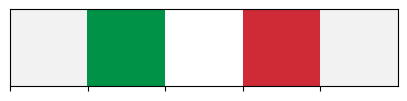

In [16]:
import seaborn as sns
ita = ['#F2F2F2','#009246', '#FFFFFF', '#CE2B37', '#F2F2F2']
sns.palplot(sns.color_palette(ita))

In [91]:
teamID = {
    "Atalanta": 8524,
    "Bologna": 9857,
    "Genoa": 10233,
    "Hellas Verona": 9876,
    "Inter": 8636,
    "Juventus": 9885,
    "Lazio": 8543,
    "Milan": 8564,
    "Napoli": 9875,
    "Roma": 8686,
    "Torino": 9804,
    "Arsenal": 9825,
    "Tottenham": 8586,
    "Paris S-G": 9847
}

In [92]:
def ax_logo(team_name, ax):
    if team_name in teamID:
        team_id = teamID[team_name]
        fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
        club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id}.png'))
        ax.imshow(club_icon)
    ax.axis('off')
    return ax

In [25]:
# function that takes an integer and an axes and plots a battery chart
def minutes_battery(minutes, ax):
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.barh([0.5], [1], fc='white', ec='black', height=0.25)
    ax.barh([0.5], [minutes/(90*38)], fc='#00529F', height=0.25)
    ax.annotate(
        f'{minutes/(90*38):.0%}',
        xy=(minutes/(90*38), 0.5),
        xytext=(-9, 0),
        textcoords='offset points',
        weight='bold',
        color='#EFE9E6',
        va='center',
        ha='center',
        size=5
    )
    ax.set_axis_off()
    return ax

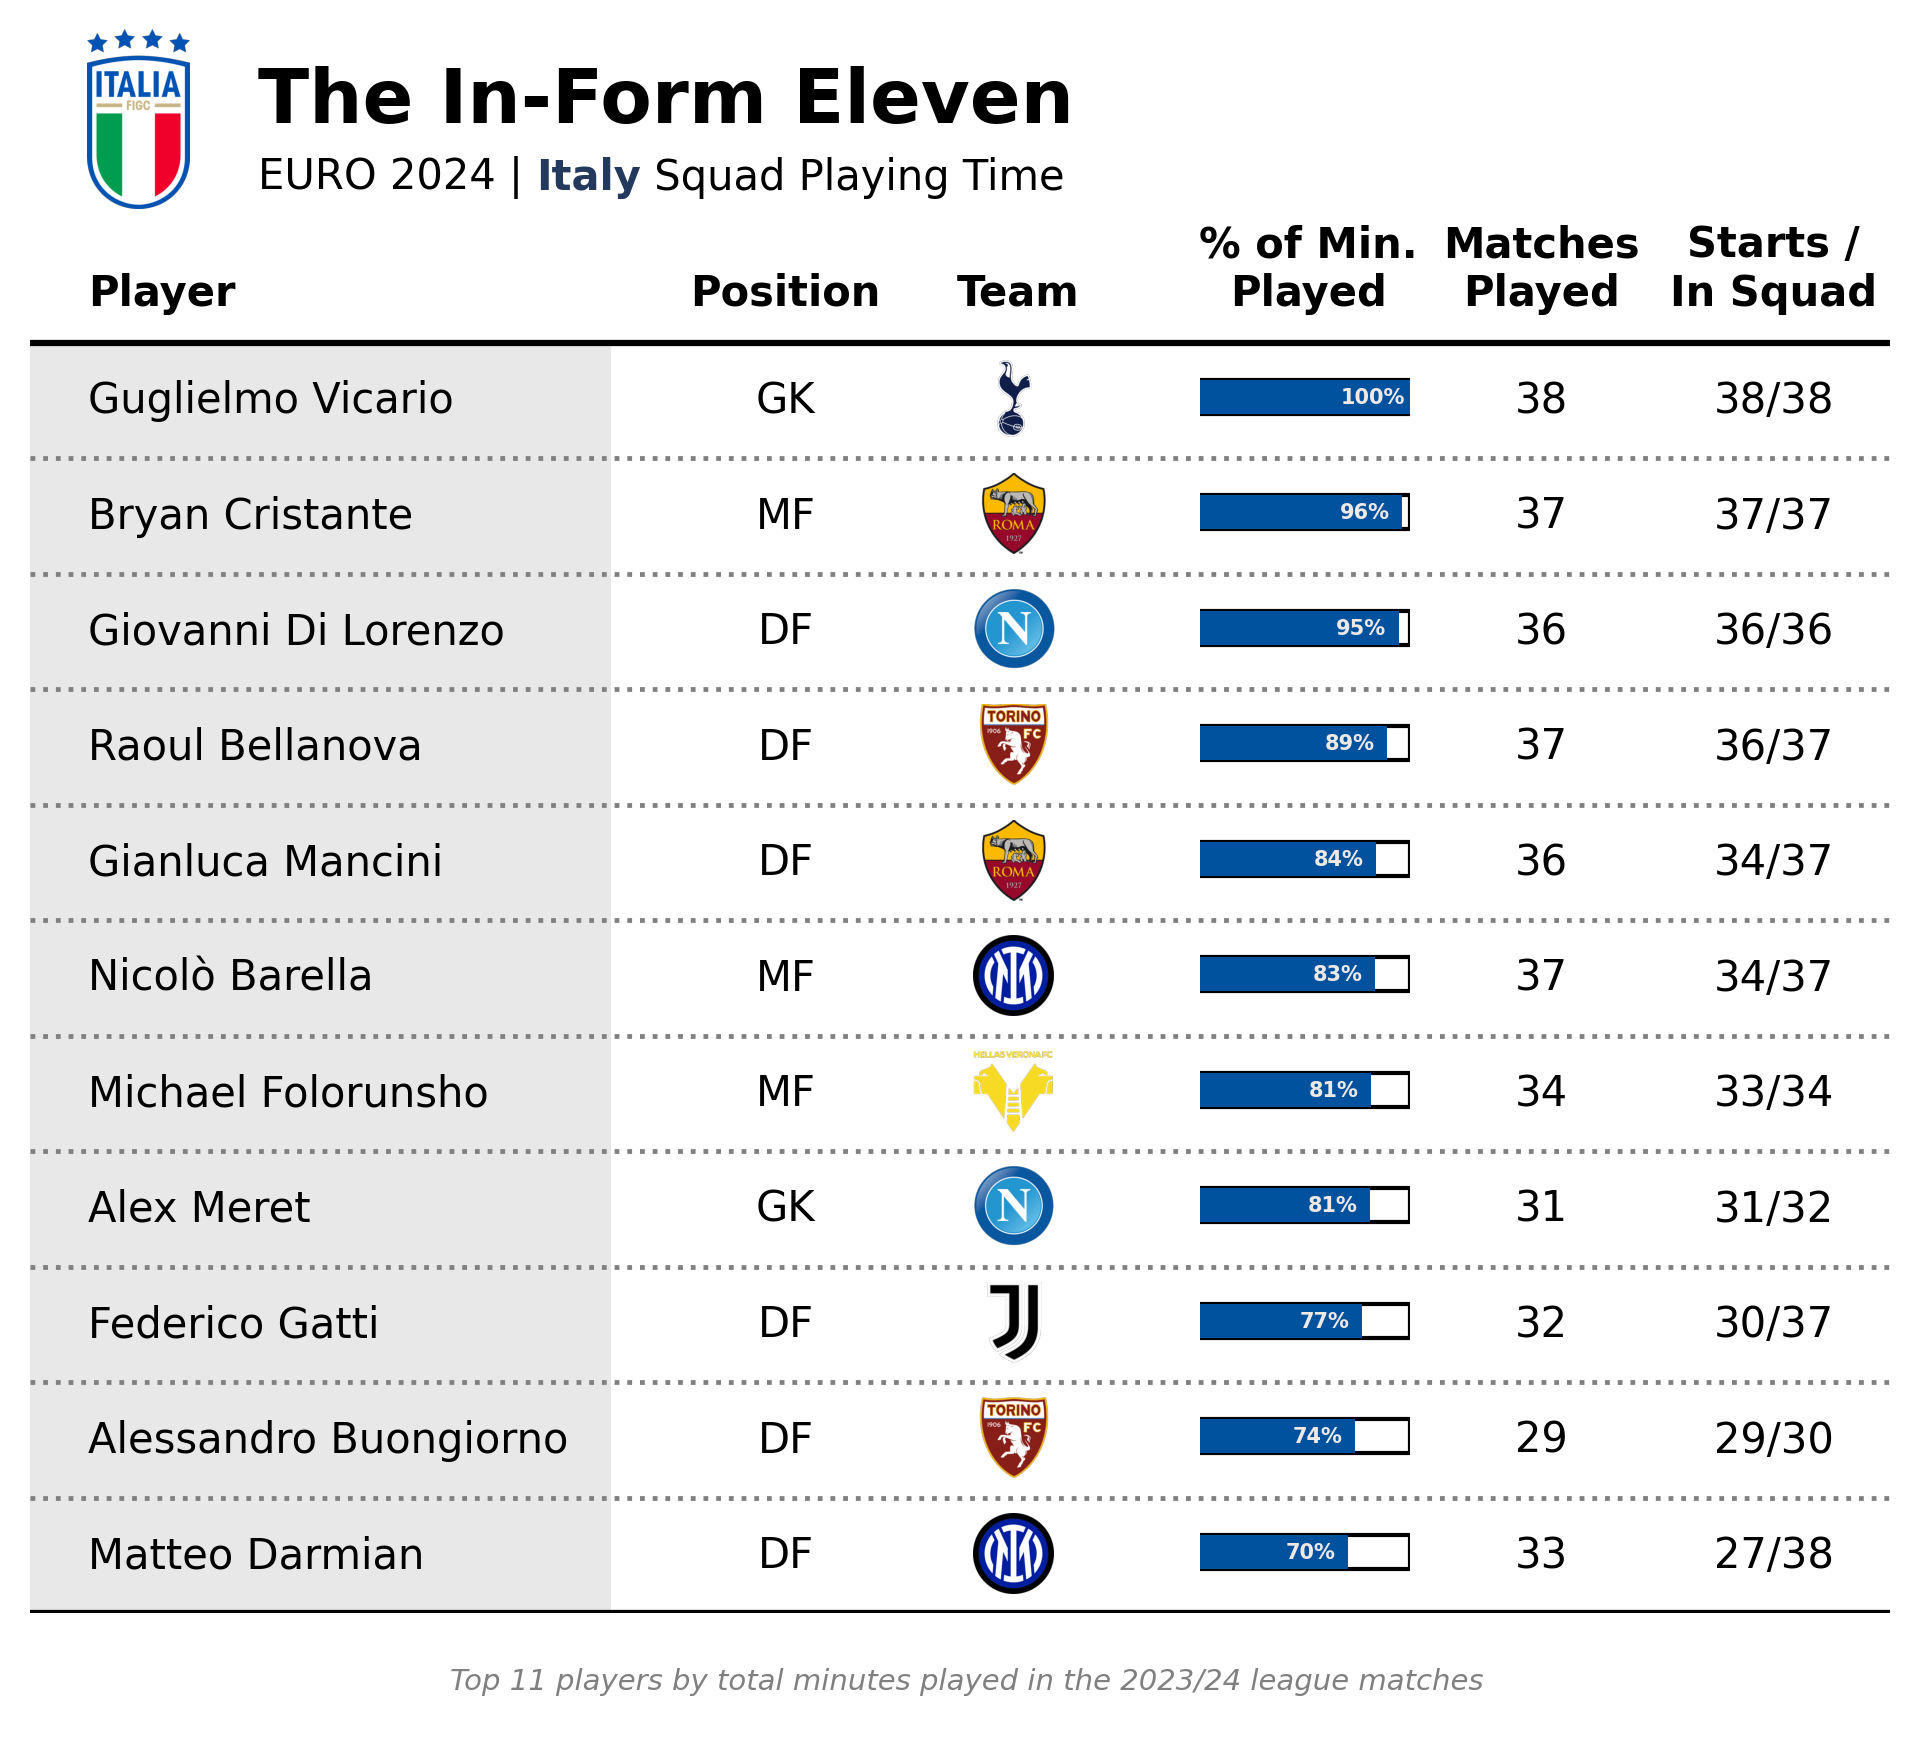

In [99]:
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = plt.subplot()

ncols = 7
nrows = italy_pt_11.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.25, 3.25, 4.25, 5.5, 6.5, 7.5]
columns = ['Player', 'Position', 'Squad', 'Min', 'MP', 'Starts/InSquad']

# add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        ha = 'left' if j == 0 else 'center'
        if column == 'Squad':  # skip printing team names
            continue
        elif column == 'Min':
            continue
        text_label = f'{italy_pt_11[column].iloc[i]}'
        weight = 'normal'
        ax.annotate(
            text_label,
            xy=(positions[j], nrows - i - 0.5), # adjust y-coordinate, before xy=(positions[j], i + 0.5)
            ha=ha,
            va='center',
            weight=weight
        )

ax_width = 0.7  # relative width of the battery bars
ax_height = 10 / nrows  # relative height of the battery bars
vertical_space = 0.23  # additional vertical space between each bar

# plot the battery bars for each row
for x in range(nrows):
    ax_coords = [4.9, nrows - x - 2.025 + (x * vertical_space)] # to reverse bars, before ax_coords = [4.9, x + 1.25 + (x * vertical_space)]
    bar_ax = fig.add_axes(
        [ax_coords[0] / (ncols + 1), ax_coords[1] / (nrows + 1), ax_width / (ncols + 1), ax_height / (nrows + 1)]
    )
    minutes_battery(italy_pt_11['Min'].iloc[x], bar_ax)

for x in range(nrows):
    ax_coords = [4.1, nrows - x - 1.85 + (x * vertical_space)]
    team_ax = fig.add_axes(
        [ax_coords[0] / (ncols + 1), ax_coords[1] / (nrows + 1), 0.045, 0.045]
    )
    ax_logo(italy_pt_11['Squad'].iloc[x], team_ax)

# add column names
column_names = ['Player', 'Position', 'Team', '% of Min.\nPlayed', 'Matches\nPlayed', 'Starts /\nIn Squad']
for index, c in enumerate(column_names):
    ha = 'left' if index == 0 else 'center'
    ax.annotate(
        c,
        xy=(positions[index], nrows + 0.25),
        ha=ha,
        va='bottom',
        weight='bold'
    )

# add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3, marker='')

ax.fill_between(
    x=[0, 2.5],
    y1=nrows,
    y2=0,
    color='lightgrey',
    alpha=0.5,
    ec='None'
)

ax.set_axis_off()

# add logo
italy_logo = Image.open('../figures/Italy.png')
logo_ax = fig.add_axes([0.12, 0.89, 0.1, 0.1], zorder=1)
logo_ax.imshow(italy_logo)
logo_ax.axis("off")

# title and subtitle for the legend
fig_text(
    x=0.22, y=0.97,
    s="The In-Form Eleven",
    color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x=0.22, y=.92,
    s="EURO 2024 | <Italy> Squad Playing Time",
    highlight_textprops=[
        {"color": "#23395D", "weight": "bold"}
        ],
    color="black",
    size=10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x=0.3, y=0.08,
    s="Top 11 players by total minutes played in the 2023/24 league matches",
    color="grey",
    size=7,
    fontstyle="italic",
    annotationbbox_kw={"xycoords": "figure fraction"}
)

plt.savefig(
    '../figures/euro2024-Italy-pt.png',
    dpi=300,
    facecolor = "white",
    bbox_inches='tight',
    edgecolor="none"
)

**Findings**

The visualization includes the top 11 players by total minutes played.

The data refer only to league matches of the 2023/24 season. The visualization highlights the absence of forwards and the presence of players who are not starters for the national team, at least theoretically and initially.